# Week 3 - Capstone Project
## Segmenting and Clustering Neighborhoods in Toronto

In this assignment, we are required to explore and cluster the neighborhoods in Toronto, Canada.

First, we need to scrape the following Wikipedia page, <a href="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" >List of Postal Codes in Canada</a>, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas  dataframe like the one shown below:

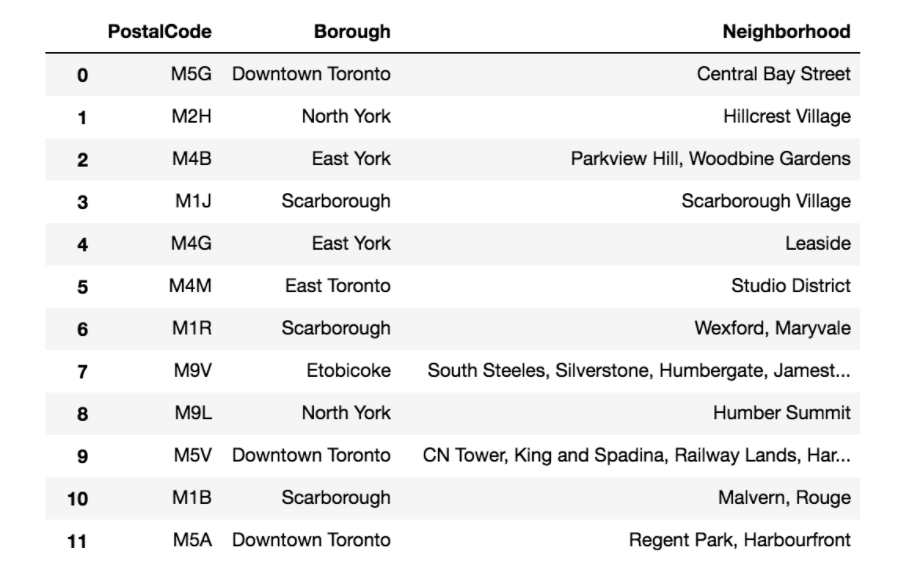

There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas  to read the table into a pandas dataframe.
Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: <a href="http://beautiful-soup-4.readthedocs.io/en/latest/" > Beautiful Soup</a>.

##### Web Scraping

In [1]:
import numpy as np

In [2]:
# First let's try using pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
table1 = pd.read_html(wiki_url, attrs = {"class" : "wikitable"}, header = 0)  # attrs: dict of attributes that you can pass to use to identify the table in the HTML. # you have to inspect html to find the code.
print(f"Extracted {len(table1)} table.")
table1[0].head()   #  html tables get saved as a list, where the first (and only if only 1) element is the table as a df

Extracted 1 table.


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [3]:
# Now using beautiful soup
# https://github.com/softhints/python/blob/master/notebooks/Scrape%20wiki%20tables%20with%20pandas%20and%20python.ipynb
# https://www.youtube.com/watch?v=ICXR9nDbudk&list=LL&index=4&ab_channel=JieJenn
# https://www.youtube.com/watch?v=xERYe99UTPc&list=LL&index=2&ab_channel=FalconInfomatic
import requests
from bs4 import BeautifulSoup

wiki_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
response = requests.get(wiki_url)
soup = BeautifulSoup(response.content, "html.parser")
my_table = soup.find('table', {"class" : "wikitable"})
# my_table = soup.find('table', attrs = "wikitable")
# my_table = soup.find('table', class = "wikitable")
df = pd.read_html(str(my_table))
print(f"Extracted {len(df)} table.")
df = df[0] #  html tables get saved as a list, where the first (and only if only 1) element is the table as a df
df.head()

Extracted 1 table.


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


- The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
- Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

##### Clean Dataframe

In [4]:
print(df["Borough"].unique())
df = df[df["Borough"] != "Not assigned"].reset_index(drop = True)  # alternative: df.query('Bourough != "Not assigned"')
df.rename(columns = {"Neighbourhood": "Neighborhood"}, inplace = True)
df.head()

['Not assigned' 'North York' 'Downtown Toronto' 'Etobicoke' 'Scarborough'
 'East York' 'York' 'East Toronto' 'West Toronto' 'Central Toronto'
 'Mississauga']


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


- More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above example table.
- If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
- In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

In [5]:
print(df.shape)

(103, 3)
